In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import mixture

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("FraminghamClean.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [4]:
X = df.drop(['TenYearCHD'], axis=1)
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
  random_state=0)


In [5]:
print(y_train.shape)
y_train.value_counts()

(2926,)


0    2492
1     434
Name: TenYearCHD, dtype: int64

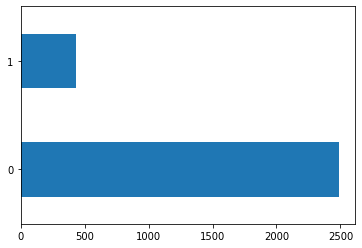

In [6]:
y_train.value_counts().plot.barh()
plt.show()

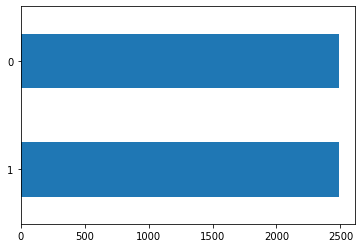

In [7]:
from sklearn.utils import resample
X_train['TenYearCHD'] = y_train
class_1 = X_train[X_train['TenYearCHD'] == 1]
class_2 = X_train[X_train['TenYearCHD'] == 0]
s_1 = resample(class_1, replace=True,n_samples=2492,random_state=42)
X_train = pd.concat([s_1,class_2], axis=0)

X_train['TenYearCHD'].value_counts().plot.barh()
plt.show()

In [8]:
y_train = X_train['TenYearCHD']
X_train = X_train.drop(['TenYearCHD'], axis=1)
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1376,1,55,1,1,20,0,0,1,0,259,217.0,112.0,29.60,63,77
780,0,42,1,1,20,0,0,1,0,199,141.0,92.0,43.69,80,60
3643,1,50,1,0,0,0,0,0,0,260,119.0,74.0,21.85,80,72
2025,1,58,1,0,0,0,0,0,0,200,128.0,83.0,29.63,68,80
478,1,53,1,0,0,0,0,1,0,240,174.5,103.0,29.82,81,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,57,1,1,20,0,0,1,0,262,131.5,92.0,28.30,70,78
3264,1,43,2,0,0,0,0,0,0,210,127.5,82.5,27.94,78,80
1653,1,62,3,1,20,0,0,0,0,300,108.0,73.0,20.87,60,80
2607,0,34,2,0,0,0,0,0,0,226,112.5,77.5,24.99,100,72


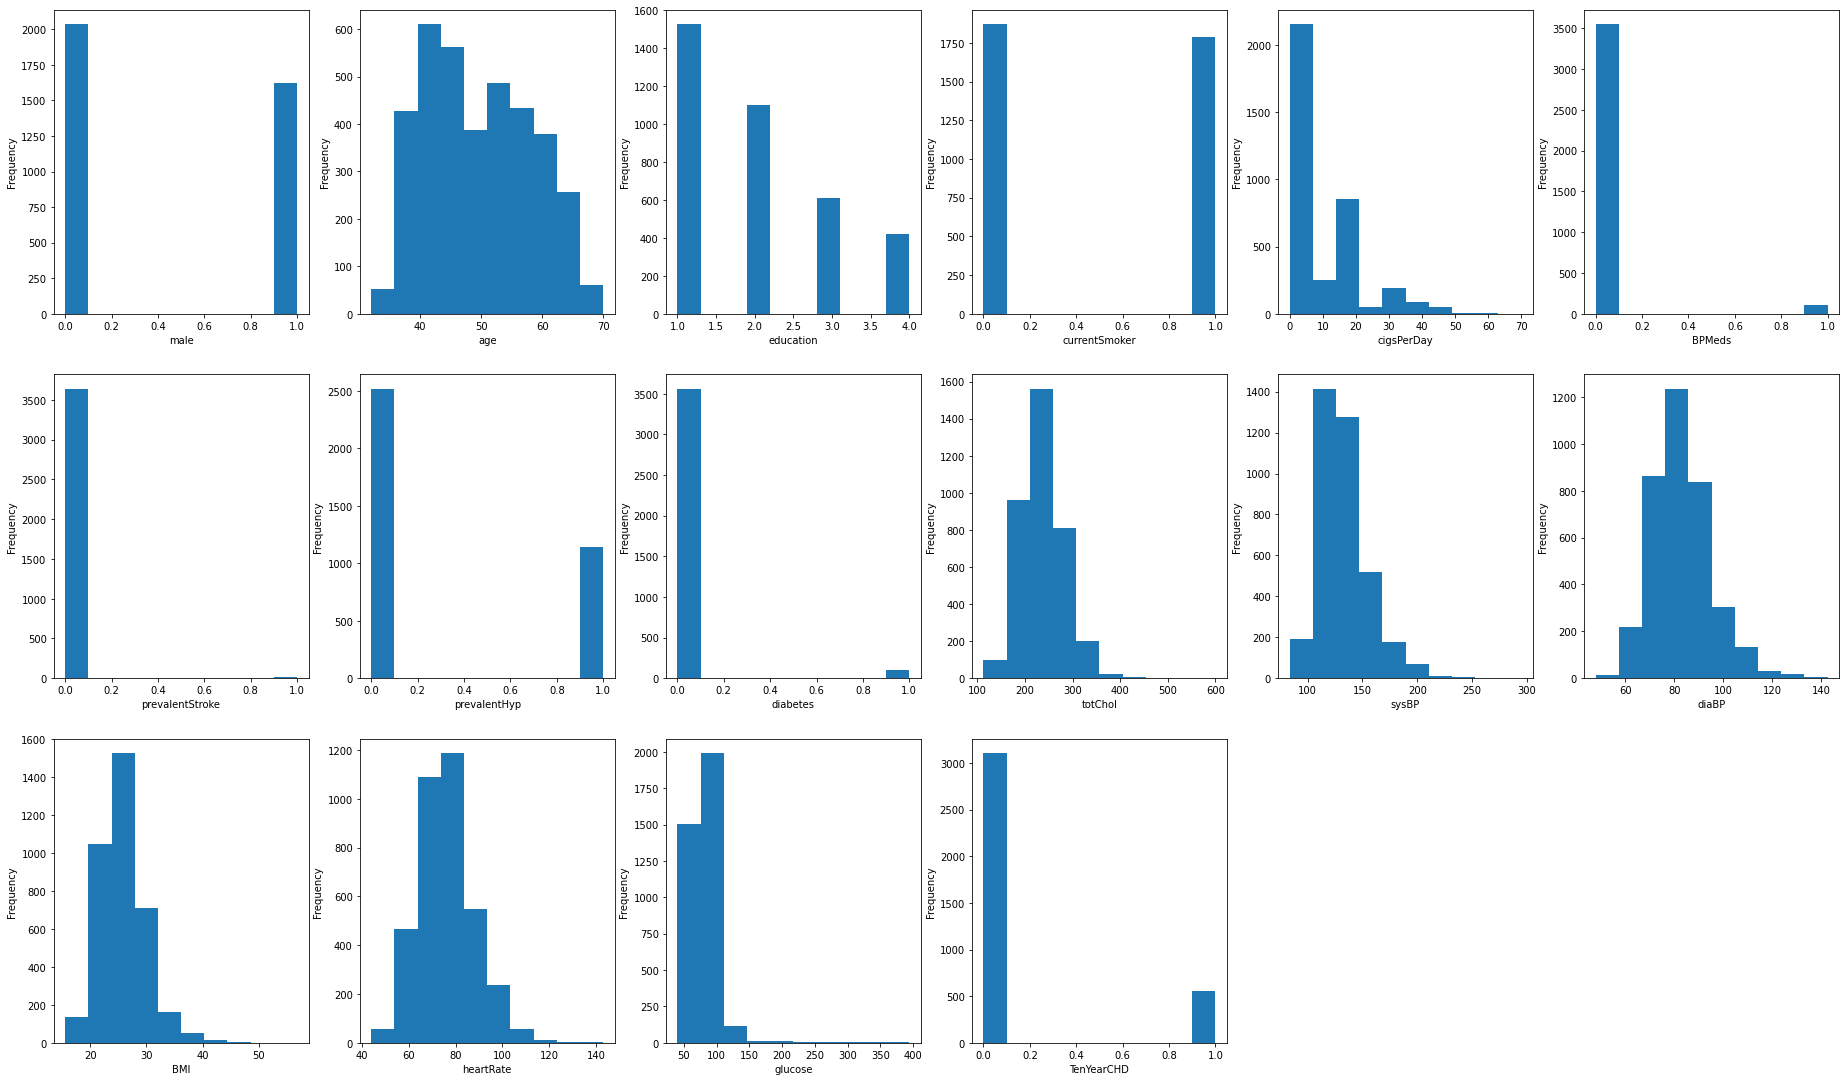

In [9]:
fig = plt.figure(figsize=(32,19))
i=0
for column in df:
    sub=fig.add_subplot(3,6,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

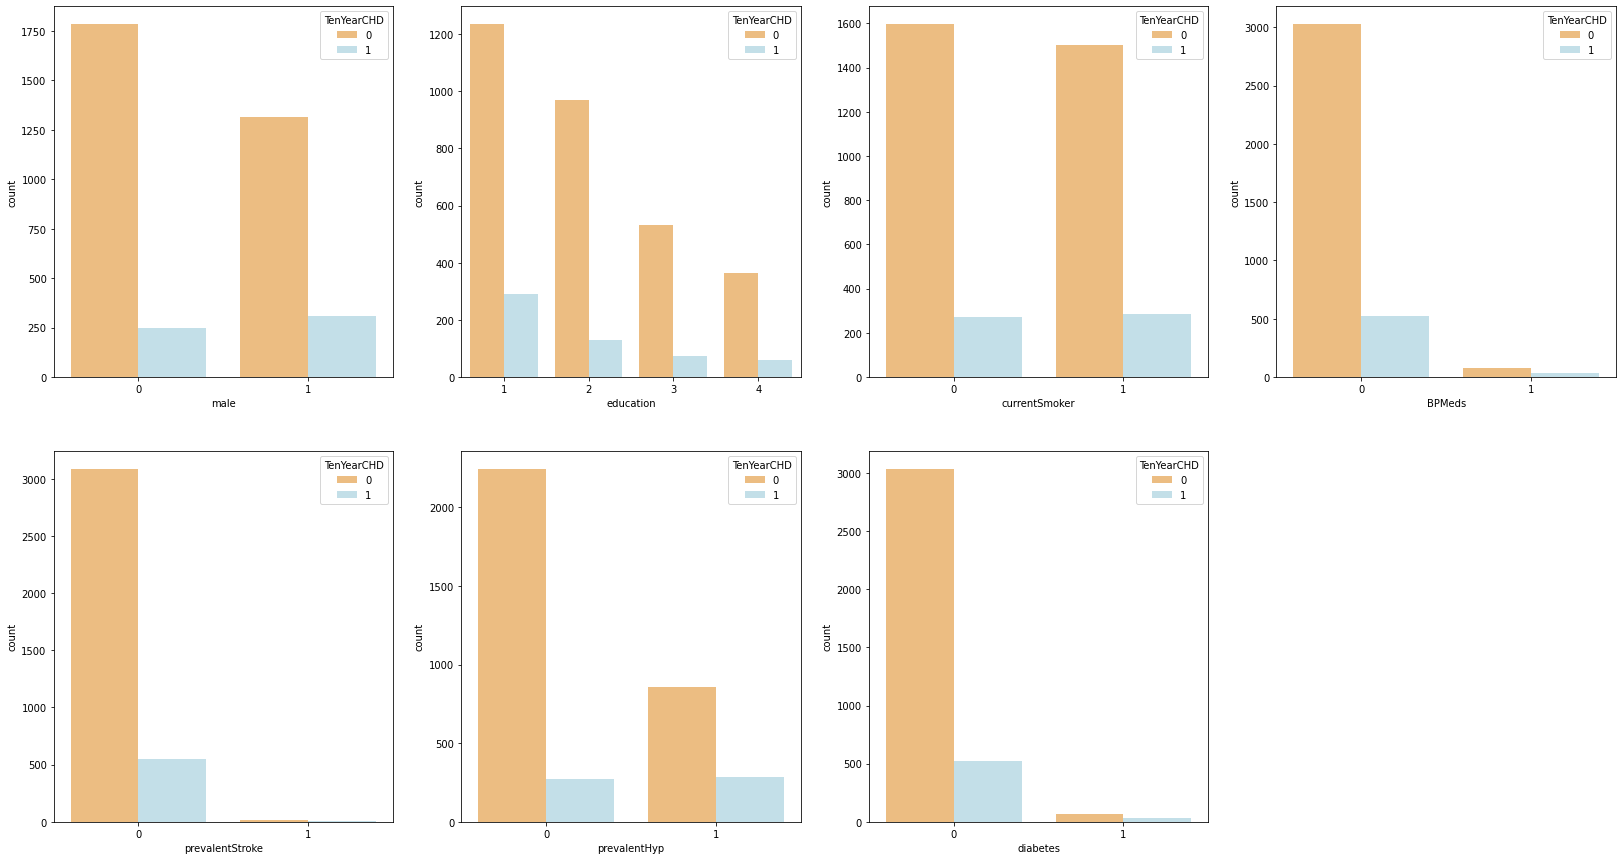

In [10]:
category = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
fig = plt.figure(figsize=(28,15))
for i in range(len(category)):
    column = category[i]
    sub=fig.add_subplot(2,4,i+1)
    chart = sns.countplot(data=df,x=column,hue='TenYearCHD',palette='RdYlBu')

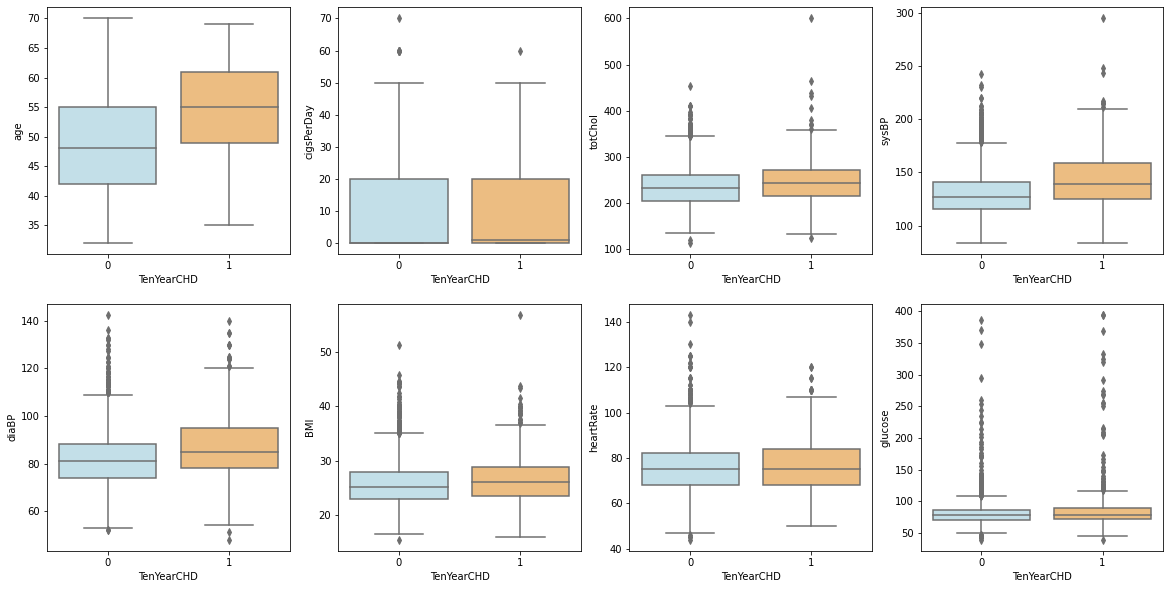

In [11]:
numerical = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
fig = plt.figure(figsize=(20,10))
for i in range(len(numerical)):
    column = numerical[i]
    sub=fig.add_subplot(2,4,i+1)
    sns.boxplot(x='TenYearCHD',y=column,data = df,palette='RdYlBu_r')

In [12]:
# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     classifiers = ['SVM','Random Forest','Logistic Regression', 'Decision tree', 'kNN']
#     grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf']},{'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion':['entropy']},{'max_iter':[100,200],'C':[0.01,1,100,1000]},{'criterion':['entropy'],'max_depth':[1,3,5,7]},{'metric':['euclidean'],'n_neighbors':[1,2,3,4,6,7,8,9,10]},{}]
#     master = {}
#     for index, value in enumerate(classifiers):
#         if value == 'SVM':
#             model = svm.SVC()
#         elif value == 'Random Forest':
#             model = RandomForestClassifier()
#         elif value == 'Logistic Regression':
#             model = LogisticRegression()
#         elif value == 'Decision tree':
#             model = DecisionTreeClassifier()
#         elif value == 'kNN':
#             model = KNeighborsClassifier()
#         parameters = grid[index]
#         clf = GridSearchCV(model, parameters)
#         clf.fit(X_train, y_train)
#         print(f"The {value} model has scored {clf.score(X_valid, y_valid)} on the valid set after GridSearchCV")
#         print(f'clf.best_score_={clf.best_score_:.3}, ' + f'clf.best_estimator_ = {clf.best_estimator_}')
#         master[value] = clf

The SVM model has scored 0.7049180327868853 on the valid set after GridSearchCV
clf.best_score_=0.684, clf.best_estimator_ = SVC(C=1000)
The Random Forest model has scored 0.7213114754098361 on the valid set after GridSearchCV
clf.best_score_=0.819, clf.best_estimator_ = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200)
The Logistic Regression model has scored 0.6557377049180327 on the valid set after GridSearchCV
clf.best_score_=0.657, clf.best_estimator_ = LogisticRegression(C=100, max_iter=200)
The Decision tree model has scored 0.6357012750455373 on the valid set after GridSearchCV
clf.best_score_=0.717, clf.best_estimator_ = DecisionTreeClassifier(criterion='entropy', max_depth=7)
The kNN model has scored 0.8032786885245902 on the valid set after GridSearchCV
clf.best_score_=0.919, clf.best_estimator_ = KNeighborsClassifier(metric='euclidean', n_neighbors=1)


In [12]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    classifiers = ['SVM','Random Forest','Logistic Regression', 'Decision tree', 'kNN']
    grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf']},{'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion':['entropy']},{'max_iter':[100,200],'C':[0.01,1,100,1000]},{'criterion':['entropy'],'max_depth':[1,3,5,7]},{'metric':['euclidean'],'n_neighbors':[1,2,3,4,6,7,8,9,10]}]
    master = {}
    for index, value in enumerate(classifiers):
        if value == 'SVM':
            model = svm.SVC()
        elif value == 'Random Forest':
            model = RandomForestClassifier()
        elif value == 'Logistic Regression':
            model = LogisticRegression()
        elif value == 'Decision tree':
            model = DecisionTreeClassifier()
        elif value == 'kNN':
            model = KNeighborsClassifier()
        parameters = grid[index]
        clf = GridSearchCV(model, parameters)
        clf.fit(X_train, y_train)
        print(f"The {value} model has scored {clf.score(X_test, y_test)} on the test set after GridSearchCV")
        print(f'clf.best_score_={clf.best_score_:.3}, ' + f'clf.best_estimator_ = {clf.best_estimator_}')
        master[value] = clf

The SVM model has scored 0.6775956284153005 on the test set after GridSearchCV
clf.best_score_=0.682, clf.best_estimator_ = SVC(C=1000)
The Random Forest model has scored 0.7349726775956285 on the test set after GridSearchCV
clf.best_score_=0.803, clf.best_estimator_ = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200)
The Logistic Regression model has scored 0.6516393442622951 on the test set after GridSearchCV
clf.best_score_=0.654, clf.best_estimator_ = LogisticRegression(C=0.01, max_iter=200)
The Decision tree model has scored 0.6297814207650273 on the test set after GridSearchCV
clf.best_score_=0.708, clf.best_estimator_ = DecisionTreeClassifier(criterion='entropy', max_depth=7)
The kNN model has scored 0.7937158469945356 on the test set after GridSearchCV
clf.best_score_=0.922, clf.best_estimator_ = KNeighborsClassifier(metric='euclidean', n_neighbors=1)


In [14]:
for i in master.keys():
    print(f"model {i} has training acc: {master[i].score(X_train,y_train)}")
    print(f"model {i} has testing acc: {master[i].score(X_test,y_test)}")

model SVM has training acc: 0.7002407704654896
model SVM has testing acc: 0.6775956284153005
model Random Forest has training acc: 0.8481139646869984
model Random Forest has testing acc: 0.7349726775956285
model Logistic Regression has training acc: 0.658908507223114
model Logistic Regression has testing acc: 0.6516393442622951
model Decision tree has training acc: 0.7453852327447833
model Decision tree has testing acc: 0.6297814207650273
model kNN has training acc: 1.0
model kNN has testing acc: 0.7937158469945356


In [29]:
from sklearn.feature_selection import RFE

rfe1 = RFE(master['Logistic Regression'].best_estimator_)
rfe1 = rfe1.fit(X_train, y_train)
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

X_train_rfe1 = X_train[X_train.columns[rfe1.support_]]
X_test_rfe1 = X_test[X_test.columns[rfe1.support_]]

new_clf1 = master['Logistic Regression'].best_estimator_
new_clf1.fit(X_train_rfe1, y_train)
print(f'the logistic regression score with RFE is {new_clf1.score(X_test_rfe1, y_test)} on test set')

rfe2 = RFE(master['Random Forest'].best_estimator_)
rfe2 = rfe2.fit(X_train, y_train)
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

X_train_rfe2 = X_train[X_train.columns[rfe2.support_]]
X_test_rfe2 = X_test[X_test.columns[rfe2.support_]]

new_clf2 = master['Random Forest'].best_estimator_
new_clf2.fit(X_train_rfe2, y_train)
print(f'the RF score with RFE is {new_clf2.score(X_test_rfe2, y_test)} on test set')

rfe3 = RFE(master['Decision tree'].best_estimator_)
rfe3 = rfe3.fit(X_train, y_train)
list(zip(X_train.columns,rfe3.support_,rfe3.ranking_))

X_train_rfe3 = X_train[X_train.columns[rfe3.support_]]
X_test_rfe3 = X_test[X_test.columns[rfe3.support_]]

new_clf3 = master['Decision tree'].best_estimator_
new_clf3.fit(X_train_rfe3, y_train)
print(f'the Decison tree score with RFE is {new_clf3.score(X_test_rfe3, y_test)} on test set')




/Users/pujanparvadia/.julia/conda/3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pujanparvadia/.julia/conda/3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

the logistic regression score with RFE is 0.6612021857923497 on test set
the RF score with RFE is 0.6994535519125683 on test set
the Decison tree score with RFE is 0.5997267759562842 on test set


In [21]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('male', True, 1),
 ('age', True, 1),
 ('education', True, 1),
 ('currentSmoker', False, 5),
 ('cigsPerDay', False, 2),
 ('BPMeds', True, 1),
 ('prevalentStroke', True, 1),
 ('prevalentHyp', True, 1),
 ('diabetes', True, 1),
 ('totChol', False, 9),
 ('sysBP', False, 3),
 ('diaBP', False, 8),
 ('BMI', False, 7),
 ('heartRate', False, 4),
 ('glucose', False, 6)]

In [22]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('male', False, 5),
 ('age', True, 1),
 ('education', False, 4),
 ('currentSmoker', False, 7),
 ('cigsPerDay', False, 2),
 ('BPMeds', False, 8),
 ('prevalentStroke', False, 9),
 ('prevalentHyp', False, 3),
 ('diabetes', False, 6),
 ('totChol', True, 1),
 ('sysBP', True, 1),
 ('diaBP', True, 1),
 ('BMI', True, 1),
 ('heartRate', True, 1),
 ('glucose', True, 1)]

In [36]:
y_pred_prob1_SVM = master['SVM'].predict(X_train)
y_pred_prob2_SVM = master['SVM'].predict(X_test)

y_pred_prob1_RandomForest = master['Random Forest'].predict(X_train_rfe2)
y_pred_prob2_RandomForest = master['Random Forest'].predict(X_test_rfe2)

y_pred_prob1_lr = master['Logistic Regression'].predict(X_train_rfe1)
y_pred_prob2_lr = master['Logistic Regression'].predict(X_test_rfe1)

y_pred_prob1_dt = master['Decision tree'].predict(X_train_rfe3)
y_pred_prob2_dt = master['Decision tree'].predict(X_test_rfe3)

y_pred_prob1_knn = master['kNN'].predict(X_train)
y_pred_prob2_knn = master['kNN'].predict(X_test)

/Users/pujanparvadia/.julia/conda/3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BPMeds
- cigsPerDay
- currentSmoker
- diabetes
- education
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 15 features, but RandomForestClassifier is expecting 7 features as input.

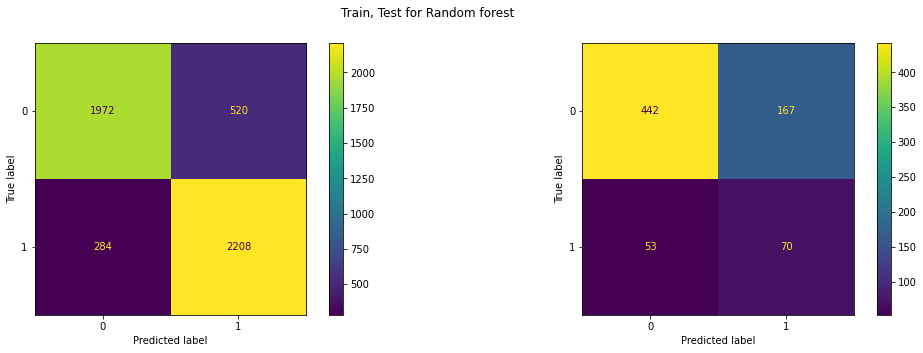

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Train, Test for Random forest')

cmp1 = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_prob1_RandomForest),
    display_labels=['0','1'],
)


cmp3 = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_prob2_RandomForest),
    display_labels=['0','1'],
)



cmp1.plot(ax=ax1)
cmp3.plot(ax=ax3)

plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Train, Test for Random forest')

cmp1 = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_prob1_SVM),
    display_labels=['0','1'],
)


cmp3 = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_prob2_SVM),
    display_labels=['0','1'],
)



cmp1.plot(ax=ax1)
cmp3.plot(ax=ax3)

plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Train, Test for Random forest')

cmp1 = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_prob1_lr),
    display_labels=['0','1'],
)


cmp3 = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_prob2_lr),
    display_labels=['0','1'],
)



cmp1.plot(ax=ax1)
cmp3.plot(ax=ax3)

plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Train, Test for Random forest')

cmp1 = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_prob1_dt),
    display_labels=['0','1'],
)


cmp3 = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_prob2_dt),
    display_labels=['0','1'],
)



cmp1.plot(ax=ax1)
cmp3.plot(ax=ax3)

plt.show()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Train, Test for Random forest')

cmp1 = ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred_prob1_knn),
    display_labels=['0','1'],
)


cmp3 = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_prob2_knn),
    display_labels=['0','1'],
)



cmp1.plot(ax=ax1)
cmp3.plot(ax=ax3)

plt.show()